 Dataset:https://huggingface.co/datasets/syntaxnoob/weather-prediction-prototype-aws

In [ ]:
import pandas as pd
import numpy as  np

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset
dataset=load_dataset('syntaxnoob/weather-prediction-prototype-aws')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/284024 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/31586 [00:00<?, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['timestamp_1', 'code_1', 'air_pressure_1', 'air_temperature_1', 'relative_humidity_1', 'precipitation_1', 'wind_speed_1', 'wind_direction_1', 'timestamp_2', 'tar_timestamp_1', 'tar_timestamp_2', 'code_2', 'tar_code_1', 'tar_code_2', 'air_pressure_2', 'tar_air_pressure_1', 'tar_air_pressure_2', 'air_temperature_2', 'tar_air_temperature_1', 'tar_air_temperature_2', 'relative_humidity_2', 'tar_relative_humidity_1', 'tar_relative_humidity_2', 'precipitation_2', 'tar_precipitation_1', 'tar_precipitation_2', 'wind_speed_2', 'tar_wind_speed_1', 'tar_wind_speed_2', 'wind_direction_2', 'tar_wind_direction_1', 'tar_wind_direction_2'],
        num_rows: 284024
    })
    test: Dataset({
        features: ['timestamp_1', 'code_1', 'air_pressure_1', 'air_temperature_1', 'relative_humidity_1', 'precipitation_1', 'wind_speed_1', 'wind_direction_1', 'timestamp_2', 'tar_timestamp_1', 'tar_timestamp_2', 'code_2', 'tar_code_1', 'tar_code_2', 'air_pres

In [ ]:
print(dataset['train'].features)

{'timestamp_1': Value(dtype='string', id=None), 'code_1': Value(dtype='int64', id=None), 'air_pressure_1': Value(dtype='float64', id=None), 'air_temperature_1': Value(dtype='float64', id=None), 'relative_humidity_1': Value(dtype='float64', id=None), 'precipitation_1': Value(dtype='float64', id=None), 'wind_speed_1': Value(dtype='float64', id=None), 'wind_direction_1': Value(dtype='float64', id=None), 'timestamp_2': Value(dtype='string', id=None), 'tar_timestamp_1': Value(dtype='string', id=None), 'tar_timestamp_2': Value(dtype='string', id=None), 'code_2': Value(dtype='float64', id=None), 'tar_code_1': Value(dtype='float64', id=None), 'tar_code_2': Value(dtype='float64', id=None), 'air_pressure_2': Value(dtype='float64', id=None), 'tar_air_pressure_1': Value(dtype='float64', id=None), 'tar_air_pressure_2': Value(dtype='float64', id=None), 'air_temperature_2': Value(dtype='float64', id=None), 'tar_air_temperature_1': Value(dtype='float64', id=None), 'tar_air_temperature_2': Value(dtype=

In [ ]:
for sample in dataset:
  print(sample)

train
test


In [ ]:
train_dataset = dataset['train']
df = train_dataset.to_pandas()
df.to_csv('weather_data.csv', index=False)

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=a3be59b0d5b7e0abfeb139c2a231f5ca72958fc6676f19dd1d1d21d79629733a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

Intializing the Spark Session

In [ ]:
spark = SparkSession.builder \
    .appName("WeatherPredictionEDA") \
    .getOrCreate()


In [ ]:
file_path = "weather_data.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)


In [ ]:
df.printSchema()

root
 |-- timestamp_1: timestamp (nullable = true)
 |-- code_1: integer (nullable = true)
 |-- air_pressure_1: double (nullable = true)
 |-- air_temperature_1: double (nullable = true)
 |-- relative_humidity_1: double (nullable = true)
 |-- precipitation_1: double (nullable = true)
 |-- wind_speed_1: double (nullable = true)
 |-- wind_direction_1: double (nullable = true)
 |-- timestamp_2: timestamp (nullable = true)
 |-- tar_timestamp_1: timestamp (nullable = true)
 |-- tar_timestamp_2: timestamp (nullable = true)
 |-- code_2: double (nullable = true)
 |-- tar_code_1: double (nullable = true)
 |-- tar_code_2: double (nullable = true)
 |-- air_pressure_2: double (nullable = true)
 |-- tar_air_pressure_1: double (nullable = true)
 |-- tar_air_pressure_2: double (nullable = true)
 |-- air_temperature_2: double (nullable = true)
 |-- tar_air_temperature_1: double (nullable = true)
 |-- tar_air_temperature_2: double (nullable = true)
 |-- relative_humidity_2: double (nullable = true)
 |-- 

In [ ]:
df.show(5)

+-------------------+------+------------------+------------------+-------------------+---------------+------------------+------------------+-------------------+-------------------+-------------------+------+----------+----------+------------------+------------------+------------------+------------------+---------------------+---------------------+-------------------+-----------------------+-----------------------+---------------+-------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|        timestamp_1|code_1|    air_pressure_1| air_temperature_1|relative_humidity_1|precipitation_1|      wind_speed_1|  wind_direction_1|        timestamp_2|    tar_timestamp_1|    tar_timestamp_2|code_2|tar_code_1|tar_code_2|    air_pressure_2|tar_air_pressure_1|tar_air_pressure_2| air_temperature_2|tar_air_temperature_1|tar_air_temperature_2|relative_humidity_2|tar_relative_humidity_1|tar_relative_hu

In [ ]:
summary_stats = df.describe().toPandas()
print(summary_stats)

  summary              code_1       air_pressure_1   air_temperature_1  \
0   count              284024               284024              284024   
1    mean  0.5744901839281188   0.5711173922532323  0.4498387157254519   
2  stddev  0.4944209473438199  0.17317828390029769  0.1298663725935148   
3     min                   0   0.0091701054562127                 0.0   
4     max                   1                  1.0                 1.0   

  relative_humidity_1       precipitation_1         wind_speed_1  \
0              284024                284024               284024   
1  0.7481783034959497  8.845625844447227E-4  0.21574615385110116   
2  0.1725437210787605  0.007269424978004836  0.12522999309320013   
3  0.0390801993656547                   0.0                  0.0   
4                 1.0     0.837630662020906                  1.0   

     wind_direction_1              code_2          tar_code_1  ...  \
0              284024              284024              284024  ...   
1  0.4

In [ ]:
#Handling the null values
from pyspark.sql.functions import col, count,when
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----------+------+--------------+-----------------+-------------------+---------------+------------+----------------+-----------+---------------+---------------+------+----------+----------+--------------+------------------+------------------+-----------------+---------------------+---------------------+-------------------+-----------------------+-----------------------+---------------+-------------------+-------------------+------------+----------------+----------------+----------------+--------------------+--------------------+
|timestamp_1|code_1|air_pressure_1|air_temperature_1|relative_humidity_1|precipitation_1|wind_speed_1|wind_direction_1|timestamp_2|tar_timestamp_1|tar_timestamp_2|code_2|tar_code_1|tar_code_2|air_pressure_2|tar_air_pressure_1|tar_air_pressure_2|air_temperature_2|tar_air_temperature_1|tar_air_temperature_2|relative_humidity_2|tar_relative_humidity_1|tar_relative_humidity_2|precipitation_2|tar_precipitation_1|tar_precipitation_2|wind_speed_2|tar_wind_speed_1|t

In [ ]:
:df.columns

['timestamp_1',
 'code_1',
 'air_pressure_1',
 'air_temperature_1',
 'relative_humidity_1',
 'precipitation_1',
 'wind_speed_1',
 'wind_direction_1',
 'timestamp_2',
 'tar_timestamp_1',
 'tar_timestamp_2',
 'code_2',
 'tar_code_1',
 'tar_code_2',
 'air_pressure_2',
 'tar_air_pressure_1',
 'tar_air_pressure_2',
 'air_temperature_2',
 'tar_air_temperature_1',
 'tar_air_temperature_2',
 'relative_humidity_2',
 'tar_relative_humidity_1',
 'tar_relative_humidity_2',
 'precipitation_2',
 'tar_precipitation_1',
 'tar_precipitation_2',
 'wind_speed_2',
 'tar_wind_speed_1',
 'tar_wind_speed_2',
 'wind_direction_2',
 'tar_wind_direction_1',
 'tar_wind_direction_2']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

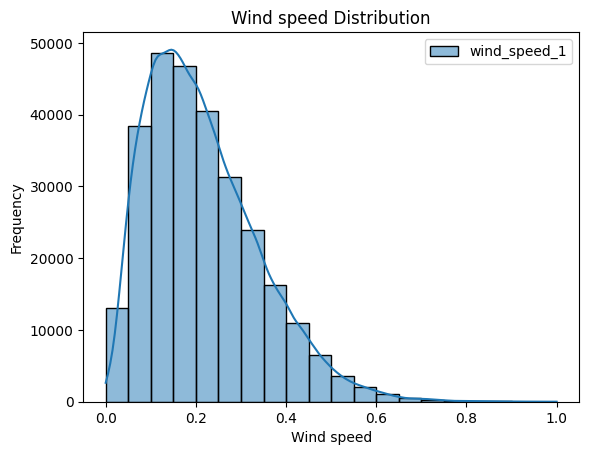

In [ ]:
#Histogram
sns.histplot(df.select("wind_speed_1").toPandas(), bins=20, kde=True)
plt.title("Wind speed Distribution")
plt.xlabel("Wind speed")
plt.ylabel("Frequency")
plt.show()
#The distribution of wind speed is right-skewed, meaning that most of the wind speed measurements are concentrated on the lower end of the scale with fewer occurrences of higher wind speeds.
# Most Common Values: The mode of the distribution (the most frequently occurring value) appears to be around 0.1 to 0.2.

In [ ]:
# Correlation analysis
correlation_matrix = df.select([col(c).cast("float") for c in df.columns]).toPandas().corr()
print(correlation_matrix)

                         timestamp_1    code_1  air_pressure_1  \
timestamp_1                 1.000000  0.150940        0.165362   
code_1                      0.150940  1.000000        0.841016   
air_pressure_1              0.165362  0.841016        1.000000   
air_temperature_1           0.032473  0.103702        0.097724   
relative_humidity_1         0.001354  0.070650       -0.021161   
precipitation_1            -0.009027 -0.028780       -0.080470   
wind_speed_1                0.035056  0.418831        0.186455   
wind_direction_1           -0.004208  0.037838       -0.043317   
timestamp_2                 1.000000  0.150940        0.165362   
tar_timestamp_1             1.000000  0.150940        0.165362   
tar_timestamp_2             1.000000  0.150940        0.165362   
code_2                     -0.158925 -0.993949       -0.835325   
tar_code_1                  0.150966  0.130139        0.107243   
tar_code_2                 -0.158951 -0.123286       -0.100875   
air_pressu

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# **K means clustering**

In [ ]:
# Selecting numerical columns for clustering
features = [col for col in df.columns if not col.startswith('tar_') and 'timestamp' not in col and 'code' not in col]

In [ ]:
#Converting 'timestamp_1' to more useful features and extending feature set for effective use of timestamp in modelling
from pyspark.sql.functions import hour, dayofweek, month
df = df.withColumn('hour_1', hour('timestamp_1'))
df = df.withColumn('day_of_week_1', dayofweek('timestamp_1'))
df = df.withColumn('month_1', month('timestamp_1'))
features.extend(['hour_1', 'day_of_week_1', 'month_1'])

In [ ]:
#Converting 'timestamp_2' in a similar way
df = df.withColumn('hour_2', hour('timestamp_2'))
df = df.withColumn('day_of_week_2', dayofweek('timestamp_2'))
df = df.withColumn('month_2', month('timestamp_2'))
features.extend(['hour_2', 'day_of_week_2', 'month_2'])

In [ ]:
df[features]

DataFrame[air_pressure_1: double, air_temperature_1: double, relative_humidity_1: double, precipitation_1: double, wind_speed_1: double, wind_direction_1: double, air_pressure_2: double, air_temperature_2: double, relative_humidity_2: double, precipitation_2: double, wind_speed_2: double, wind_direction_2: double, hour_1: int, day_of_week_1: int, month_1: int, hour_2: int, day_of_week_2: int, month_2: int]

In [ ]:
#Aseembling all the features together and converting to the vector form to pass for training and prediction by the machine learning model
assembler = VectorAssembler(inputCols=features, outputCol="features")
df = assembler.transform(df)

In [ ]:
#Main algorithm for KMeans
from pyspark.ml.clustering import KMeans
k = 5
kmeans = KMeans(featuresCol="features", k=k, seed=1)
#seed: A random seed for cluster initialization. Using a seed ensures reproducibility of the results.
model = kmeans.fit(df.limit(100))
predictions = model.transform(df)

# Evaluation of clustering by computing Silhouette score
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
#The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and
#poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate
print("Silhouette with squared euclidean distance = " + str(silhouette))
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.21839406744530332
Cluster Centers: 
[ 0.59789852  0.41453254  0.64809885  0.          0.13125549  0.47111111
  0.70535687  0.43447381  0.62368789  0.          0.15309482  0.60872685
 11.5         6.         11.         11.5         6.         11.        ]
[ 0.63613022  0.39810831  0.82660757  0.          0.17028826  0.32834491
  0.63639386  0.39800587  0.8248046   0.          0.1659899   0.32421296
  1.5         6.         11.          1.5         6.         11.        ]
[ 0.68988232  0.40954722  0.72957887  0.          0.08708906  0.56975309
  0.61834021  0.39576362  0.81937522  0.          0.10486782  0.4012963
  9.          6.         11.          9.          6.         11.        ]
[ 0.64693844  0.39504759  0.61712732  0.          0.13129539  0.52863636
  0.64691759  0.3968356   0.60907958  0.          0.12818262  0.60515152
 14.36363636  6.         11.         14.36363636  6.         11.        ]
[ 0.6180269   0.39000717  0.83219113  

In [ ]:
#To convert vectorized form of centers to original values of features
features = [
    'air_pressure_1', 'air_temperature_1', 'relative_humidity_1', 'precipitation_1',
    'wind_speed_1', 'wind_direction_1', 'air_pressure_2', 'air_temperature_2',
    'relative_humidity_2', 'precipitation_2', 'wind_speed_2', 'wind_direction_2',
    'hour_2', 'day_of_week_2', 'month_2', 'hour_1', 'day_of_week_1', 'month_1',
    'hour_2', 'day_of_week_2', 'month_2'
]

for i, center in enumerate(centers):
    print(f"Cluster {i+1} Centers:")
    for feature, value in zip(features, center):
        print(f"{feature}: {value:.2f}")
    print("\n")

Cluster 1 Centers:
air_pressure_1: 0.60
air_temperature_1: 0.41
relative_humidity_1: 0.65
precipitation_1: 0.00
wind_speed_1: 0.13
wind_direction_1: 0.47
air_pressure_2: 0.71
air_temperature_2: 0.43
relative_humidity_2: 0.62
precipitation_2: 0.00
wind_speed_2: 0.15
wind_direction_2: 0.61
hour_2: 11.50
day_of_week_2: 6.00
month_2: 11.00
hour_1: 11.50
day_of_week_1: 6.00
month_1: 11.00


Cluster 2 Centers:
air_pressure_1: 0.64
air_temperature_1: 0.40
relative_humidity_1: 0.83
precipitation_1: 0.00
wind_speed_1: 0.17
wind_direction_1: 0.33
air_pressure_2: 0.64
air_temperature_2: 0.40
relative_humidity_2: 0.82
precipitation_2: 0.00
wind_speed_2: 0.17
wind_direction_2: 0.32
hour_2: 1.50
day_of_week_2: 6.00
month_2: 11.00
hour_1: 1.50
day_of_week_1: 6.00
month_1: 11.00


Cluster 3 Centers:
air_pressure_1: 0.69
air_temperature_1: 0.41
relative_humidity_1: 0.73
precipitation_1: 0.00
wind_speed_1: 0.09
wind_direction_1: 0.57
air_pressure_2: 0.62
air_temperature_2: 0.40
relative_humidity_2: 0.82

**Interpretation of KMeans Clustering**: The cluster to which a new data point is assigned represents the weather pattern that most closely matches it. For example, if a cluster center has high humidity and low temperature and a new data point is assigned to this cluster, one might interpret this as predicting foggy and cold weather.

# **Naive Bayes Classifier**

Since naive bayes is primarily used in classification tasks,preprocessing steps include converting real value data into binary data for classification.

In [ ]:
#Since the data provided is already normalized,so converting the data into binary by keeping a threshold of 0.5
threshold_temperature = 0.5
threshold_airpressure=0.5
threshold_relativehumidity=0.5
threshold_preciptation=0.5
threshold_windspeed=0.5
df1 = df1.withColumn("high_humidity_2", (col("relative_humidity_2") > threshold_relativehumidity).cast("int"))
df1 = df1.withColumn("high_precipitation_1", (col("precipitation_1") > threshold_preciptation).cast("int"))
df1 = df1.withColumn("high_precipitation_2", (col("precipitation_2") > threshold_preciptation).cast("int"))
df1 = df1.withColumn("high_windspeed_1", (col("wind_speed_1") > threshold_windspeed).cast("int"))
df1 = df1.withColumn("high_windspeed_2", (col("wind_speed_2") > threshold_windspeed).cast("int"))

In [ ]:
df1=df

In [ ]:
df1 = df1.withColumn("high_temperature_1", (col("air_temperature_1") > threshold_temperature).cast("int"))

In [ ]:
df1 = df1.withColumn("high_temperature_2", (col("air_temperature_2") > threshold_temperature).cast("int"))

In [ ]:
df1 = df1.withColumn("high_pressure_1", (col("air_pressure_1") > threshold_airpressure).cast("int"))

In [ ]:
df1 = df1.withColumn("high_pressure_2", (col("air_pressure_2") > threshold_airpressure).cast("int"))

In [ ]:
df1 = df1.withColumn("high_humidity_1", (col("relative_humidity_1") > threshold_relativehumidity).cast("int"))

In [ ]:
df1.columns

['timestamp_1',
 'code_1',
 'air_pressure_1',
 'air_temperature_1',
 'relative_humidity_1',
 'precipitation_1',
 'wind_speed_1',
 'wind_direction_1',
 'timestamp_2',
 'tar_timestamp_1',
 'tar_timestamp_2',
 'code_2',
 'tar_code_1',
 'tar_code_2',
 'air_pressure_2',
 'tar_air_pressure_1',
 'tar_air_pressure_2',
 'air_temperature_2',
 'tar_air_temperature_1',
 'tar_air_temperature_2',
 'relative_humidity_2',
 'tar_relative_humidity_1',
 'tar_relative_humidity_2',
 'precipitation_2',
 'tar_precipitation_1',
 'tar_precipitation_2',
 'wind_speed_2',
 'tar_wind_speed_1',
 'tar_wind_speed_2',
 'wind_direction_2',
 'tar_wind_direction_1',
 'tar_wind_direction_2',
 'hour_1',
 'day_of_week_1',
 'month_1',
 'hour_2',
 'day_of_week_2',
 'month_2',
 'features',
 'hot_temperature_1',
 'hot_temperature_2',
 'high_pressure_1',
 'high_pressure_2',
 'high_humidity_1',
 'high_humidity_2',
 'high_precipitation_1',
 'high_precipitation_2',
 'high_windspeed_1',
 'high_windspeed_2',
 'high_temperature_1',
 '

In [ ]:
# Adjusting the feature selection to include only columns that contain the term 'high'i.e. only binary valued columns
features = [col for col in df1.columns if 'high' in col]
df_high_features = df1.select(features)
df_high_features.show()

+---------------+---------------+---------------+---------------+--------------------+--------------------+----------------+----------------+------------------+------------------+
|high_pressure_1|high_pressure_2|high_humidity_1|high_humidity_2|high_precipitation_1|high_precipitation_2|high_windspeed_1|high_windspeed_2|high_temperature_1|high_temperature_2|
+---------------+---------------+---------------+---------------+--------------------+--------------------+----------------+----------------+------------------+------------------+
|              1|              0|              1|              1|                   0|                   0|               0|               0|                 0|                 0|
|              0|              1|              1|              1|                   0|                   0|               0|               0|                 0|                 0|
|              0|              1|              1|              1|                   0|              

In [ ]:
df1[features]

DataFrame[high_pressure_1: int, high_pressure_2: int, high_humidity_1: int, high_humidity_2: int, high_precipitation_1: int, high_precipitation_2: int, high_windspeed_1: int, high_windspeed_2: int, high_temperature_1: int, high_temperature_2: int]

In [ ]:
df1.show(10)

+-------------------+------+------------------+------------------+-------------------+---------------+------------------+------------------+-------------------+-------------------+-------------------+------+----------+----------+------------------+------------------+------------------+------------------+---------------------+---------------------+-------------------+-----------------------+-----------------------+---------------+-------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+------+-------------+-------+------+-------------+-------+--------------------+-----------------+-----------------+---------------+---------------+---------------+---------------+--------------------+--------------------+----------------+----------------+------------------+------------------+
|        timestamp_1|code_1|    air_pressure_1| air_temperature_1|relative_humidity_1|precipitation_1|      wind_sp

In [ ]:
#Assembling the feature column into single vectorized column and high precipiation is taken as target column
binary_features = [
    'high_temperature_1', 'high_humidity_1', 'high_windspeed_1',
    'high_temperature_2', 'high_humidity_2', 'high_windspeed_2'
]
assembler = VectorAssembler(inputCols=binary_features, outputCol="features")
df_high_features = assembler.transform(df_high_features)

df_high_features = df_high_features.withColumn("label", df1["high_precipitation_1"].cast("int"))

In [ ]:
# Splitting the data into training and test sets
train_data, test_data = df_high_features.randomSplit([0.7, 0.3], seed=1234)

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# Training a Naive Bayes model
nb = NaiveBayes(modelType="bernoulli")
model = nb.fit(train_data)

In [ ]:
# Predicting and testing on test data
predictions = model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

Test set accuracy = 0.9999882119954734


# **KNN**

In [ ]:
df.columns

['timestamp_1',
 'code_1',
 'air_pressure_1',
 'air_temperature_1',
 'relative_humidity_1',
 'precipitation_1',
 'wind_speed_1',
 'wind_direction_1',
 'timestamp_2',
 'tar_timestamp_1',
 'tar_timestamp_2',
 'code_2',
 'tar_code_1',
 'tar_code_2',
 'air_pressure_2',
 'tar_air_pressure_1',
 'tar_air_pressure_2',
 'air_temperature_2',
 'tar_air_temperature_1',
 'tar_air_temperature_2',
 'relative_humidity_2',
 'tar_relative_humidity_1',
 'tar_relative_humidity_2',
 'precipitation_2',
 'tar_precipitation_1',
 'tar_precipitation_2',
 'wind_speed_2',
 'tar_wind_speed_1',
 'tar_wind_speed_2',
 'wind_direction_2',
 'tar_wind_direction_1',
 'tar_wind_direction_2',
 'hour_1',
 'day_of_week_1',
 'month_1',
 'hour_2',
 'day_of_week_2',
 'month_2',
 'features']

In [ ]:
df3=df

In [ ]:
# Assembling features into a single vector column and  assuming 'tar_air_pressure_1' is the column we want to predict
feature_columns = [
    'air_pressure_1', 'air_temperature_1', 'relative_humidity_1',
    'precipitation_1', 'wind_speed_1', 'air_pressure_2', 'air_temperature_2',
    'relative_humidity_2', 'precipitation_2', 'wind_speed_2'
]


assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df3 = assembler.transform(df3)
df3 = df3.withColumn("label", col("tar_air_pressure_1").cast("double"))  # Cast to double if it's a regression problem

# Split the data into training and test sets
train_data, test_data = df3.randomSplit([0.7, 0.3], seed=1234)

In [ ]:
from pyspark.sql.functions import udf
from pyspark.ml.linalg import Vectors
from pyspark.sql.types import IntegerType

In [ ]:
# Collect training data as a list and broadcasting it to all the worker nodes in the same cluster
train_features = train_data.select("features", "label").collect()
broadcast_train = spark.sparkContext.broadcast(train_features)

# Defining a UDF to compute the Euclidean distance and determine the majority label from k-nearest neighbors
def predict_knn(features, k):
    train_data = broadcast_train.value
    distances = [(float(features.squared_distance(row['features'])), row['label']) for row in train_data]
    sorted_distances = sorted(distances, key=lambda x: x[0])
    top_k = sorted_distances[:k]
    labels = [label for _, label in top_k]
    # Majority vote or average for regression
    return np.mean(labels)

# Registering UDF
udf_predict_knn = udf(lambda x: predict_knn(x, 3), IntegerType())  # k=3 as an example

# Applying the UDF to the test data
test_data = test_data.withColumn("predicted_label", udf_predict_knn(col("features")))
test_data.show()

In [ ]:
#Evaluation
from pyspark.ml.evaluation import RegressionEvaluator
test_data = test_data.withColumn("predicted_label", col("predicted_label").cast("double"))
evaluator = RegressionEvaluator(labelCol="label", predictionCol="predicted_label", metricName="rmse")
rmse = evaluator.evaluate(test_data)
print("Test set RMSE = " + str(rmse))

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

The above code was executed locally and results were obtained.Here it is taking too long to run.